Importing the data

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/Crab Molt Data.csv")

Label encoding the column 'Location'

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])
data

,Post-molt,Pre-molt,Location
0,127.7,113.6,0
1,133.2,118.1,0
2,135.3,119.9,0
3,143.3,126.2,0
4,139.3,126.7,0
...,...,...,...
467,150.3,135.9,1
468,151.2,135.6,1
469,143.5,129.6,1
470,148.3,134.1,1


Checking null values

In [3]:
data.isnull().sum()

,0
Post-molt,0
Pre-molt,0
Location,0


Descriptive statistics

In [4]:
from scipy.stats import skew, kurtosis
pre_molt = data['Pre-molt']
post_molt = data['Post-molt']
def descriptive_stats(data):
    stats = {
        'Minimum': data.min(),
        'Maximum': data.max(),
        'Median': data.median(),
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data)
    }
    return pd.Series(stats)
pre_molt_stats = descriptive_stats(pre_molt).rename('Pre-Molt')
post_molt_stats = descriptive_stats(post_molt).rename('Post-Molt')
combined_stats = pd.DataFrame({'Pre-Molt': pre_molt_stats, 'Post-Molt': post_molt_stats})
print("\nDescriptive Statistics Table:")
display(combined_stats)


Descriptive Statistics Table:


,Pre-Molt,Post-Molt
Minimum,31.100000,38.800000
Maximum,155.100000,166.800000
Median,132.800000,147.400000
Mean,129.211864,143.897669
Standard Deviation,15.864520,14.640602
Skewness,-2.003487,-2.346902
Kurtosis,6.766322,10.116042


Scatter plot

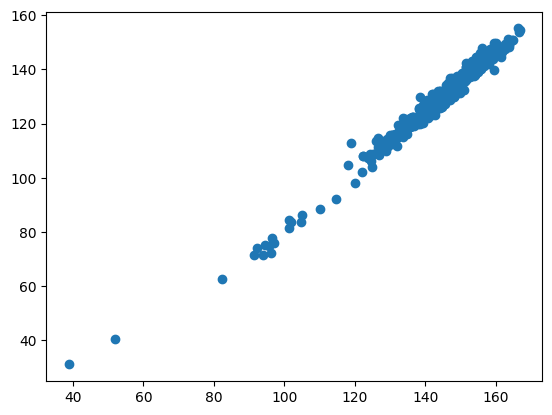

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data['Post-molt'],data['Pre-molt'])
plt.show()

Smooth Histogram

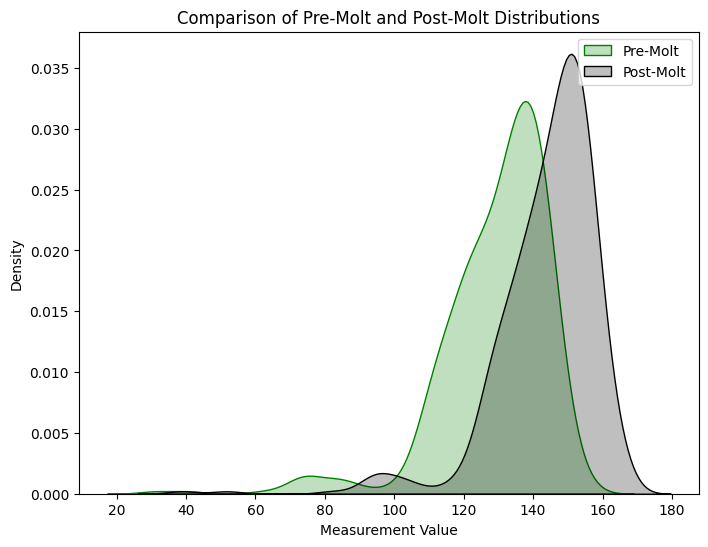

In [9]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.kdeplot(pre_molt, label='Pre-Molt', color='green', fill=True)
sns.kdeplot(post_molt, label='Post-Molt', color='black', fill=True)
plt.title('Comparison of Pre-Molt and Post-Molt Distributions')
plt.xlabel('Measurement Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Quantile plot for pre and post Molt data

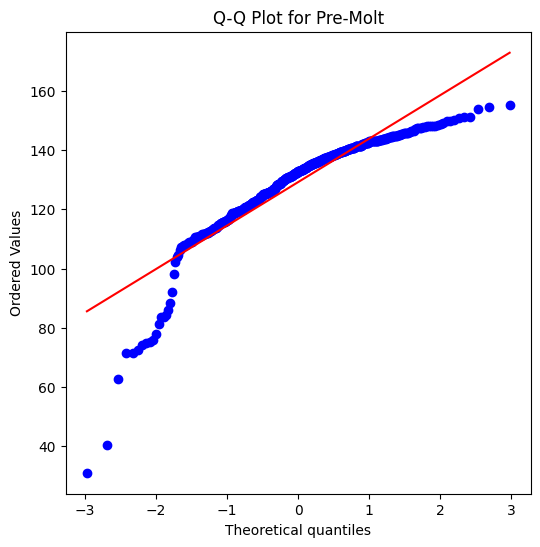

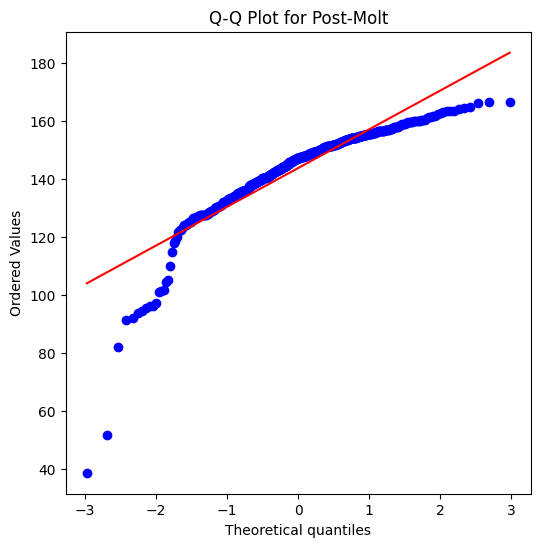

In [27]:
from scipy.stats import probplot
pre_molt_data = data['Pre-molt']
post_molt_data = data['Post-molt']
plt.figure(figsize=(6, 6))
probplot(pre_molt_data, dist="norm", plot=plt)
plt.title('Q-Q Plot for Pre-Molt')
plt.show()
plt.figure(figsize=(6, 6))
probplot(post_molt_data, dist="norm", plot=plt)
plt.title('Q-Q Plot for Post-Molt')
plt.show()

Normality test for the data
1. Andreson-Darling test

In [28]:
from scipy.stats import anderson
ad_test_pre = anderson(pre_molt_data)
print(f"Anderson-Darling test for Pre-Molt: Statistic = {ad_test_pre.statistic}, Critical values = {ad_test_pre.critical_values}")
ad_test_post = anderson(post_molt_data)
print(f"Anderson-Darling test for Post-Molt: Statistic = {ad_test_post.statistic}, Critical values = {ad_test_post.critical_values}")

Anderson-Darling test for Pre-Molt: Statistic = 12.947777132426495, Critical values = [0.571 0.651 0.78  0.91  1.083]
Anderson-Darling test for Post-Molt: Statistic = 13.970186941171676, Critical values = [0.571 0.651 0.78  0.91  1.083]


2. Kolmogorov- Smirnov test

In [29]:
from scipy.stats import kstest
ks_test_pre = kstest(pre_molt_data, 'norm', args=(np.mean(pre_molt_data), np.std(pre_molt_data)))
print(f"Kolmogorov-Smirnov test for Pre-Molt: Statistic = {ks_test_pre.statistic}, p-value = {ks_test_pre.pvalue}")
ks_test_post = kstest(post_molt_data, 'norm', args=(np.mean(post_molt_data), np.std(post_molt_data)))
print(f"Kolmogorov-Smirnov test for Post-Molt: Statistic = {ks_test_post.statistic}, p-value = {ks_test_post.pvalue}")

Kolmogorov-Smirnov test for Pre-Molt: Statistic = 0.10047332186543623, p-value = 0.0001336095286419177
Kolmogorov-Smirnov test for Post-Molt: Statistic = 0.10295773382621526, p-value = 8.26124521137443e-05


3. Cramér-von Mises test

In [30]:
from scipy.stats import cramervonmises
cvm_test_pre = cramervonmises(pre_molt_data, 'norm')
print(f"Cramér-von Mises test for Pre-Molt: Statistic = {cvm_test_pre.statistic}, p-value = {cvm_test_pre.pvalue}")
cvm_test_post = cramervonmises(post_molt_data, 'norm')
print(f"Cramér-von Mises test for Post-Molt: Statistic = {cvm_test_post.statistic}, p-value = {cvm_test_post.pvalue}")

Cramér-von Mises test for Pre-Molt: Statistic = 157.33333333333331, p-value = 4.2552647294691326e-08
Cramér-von Mises test for Post-Molt: Statistic = 157.33333333333331, p-value = 4.2552647294691326e-08


4. Shapiro–Wilk test

In [31]:
from scipy.stats import shapiro
sw_test_pre = shapiro(pre_molt_data)
print(f"Shapiro-Wilk test for Pre-Molt: Statistic = {sw_test_pre.statistic}, p-value = {sw_test_pre.pvalue}")
sw_test_post = shapiro(post_molt_data)
print(f"Shapiro-Wilk test for Post-Molt: Statistic = {sw_test_post.statistic}, p-value = {sw_test_post.pvalue}")

Shapiro-Wilk test for Pre-Molt: Statistic = 0.8502103867445177, p-value = 9.000187748233194e-21
Shapiro-Wilk test for Post-Molt: Statistic = 0.8298033094981744, p-value = 4.861382514717977e-22


OLS regression

In [12]:
import statsmodels.api as sm
import seaborn as sns
X = data['Pre-molt']
y = data['Post-molt']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
residuals = model.resid
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Post-molt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.405e+04
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:45:18   Log-Likelihood:                -1002.7
No. Observations:                 472   AIC:                             2009.
Df Residuals:                     470   BIC:                             2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8026      0.767     33.632      0.000      24.295      27.310
Pre-molt       0.9140      0.006    155.083      0.000       0.902       0.926
==============================================================================
Omnibus:                      179.663   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1768.232
Skew:                          -1.357   Prob(JB):                         0.00
Kurtosis:                      12.086   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

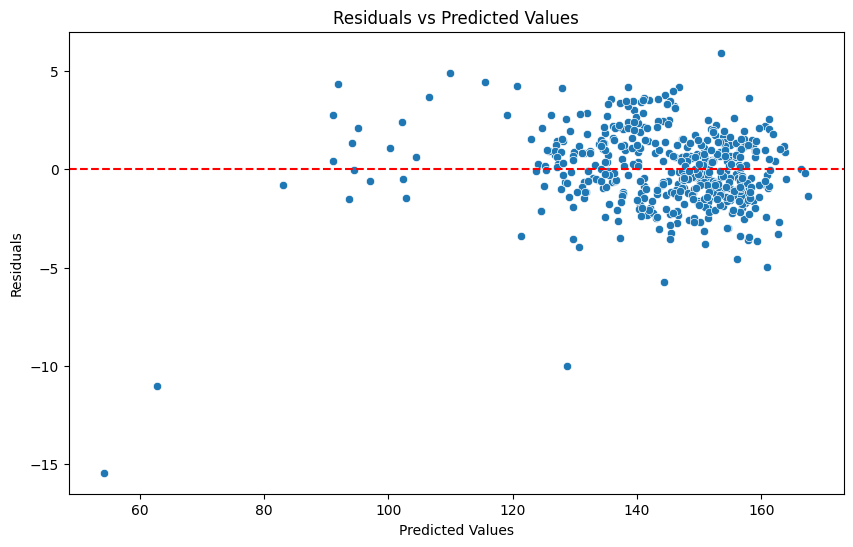

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Linear regression

In [14]:
from sklearn.linear_model import LinearRegression
X = data["Pre-molt"]
Y = data["Post-molt"]
model = LinearRegression()
model.fit(X.values.reshape(-1,1),Y)

LinearRegression()

In [15]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): 0.9139647480393145
Intercept: 25.802580395292992


In [16]:
prediction = model.predict(X.values.reshape(-1,1))
predicted_vs_actual = pd.DataFrame({'Pre-molt': X,'Actual Post-molt': Y, 'Predicted Post-molt': prediction})
print(predicted_vs_actual)

     Pre-molt  Actual Post-molt  Predicted Post-molt
0       113.6             127.7           129.628976
1       118.1             133.2           133.741817
2       119.9             135.3           135.386954
3       126.2             143.3           141.144932
4       126.7             139.3           141.601914
..        ...               ...                  ...
467     135.9             150.3           150.010390
468     135.6             151.2           149.736200
469     129.6             143.5           144.252412
470     134.1             148.3           148.365253
471     114.4             129.2           130.360148

[472 rows x 3 columns]


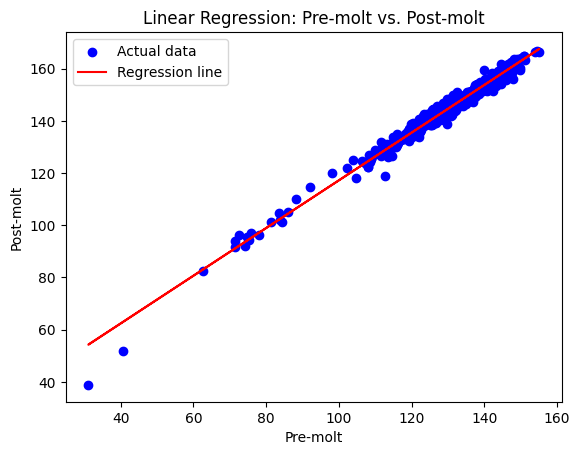

In [17]:
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, prediction, color='red', label='Regression line')
plt.xlabel('Pre-molt')
plt.ylabel('Post-molt')
plt.title('Linear Regression: Pre-molt vs. Post-molt')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y, prediction)
print(f"Pearson's R-squared value: {r_squared:.2f}")

Pearson's R-squared value: 0.98


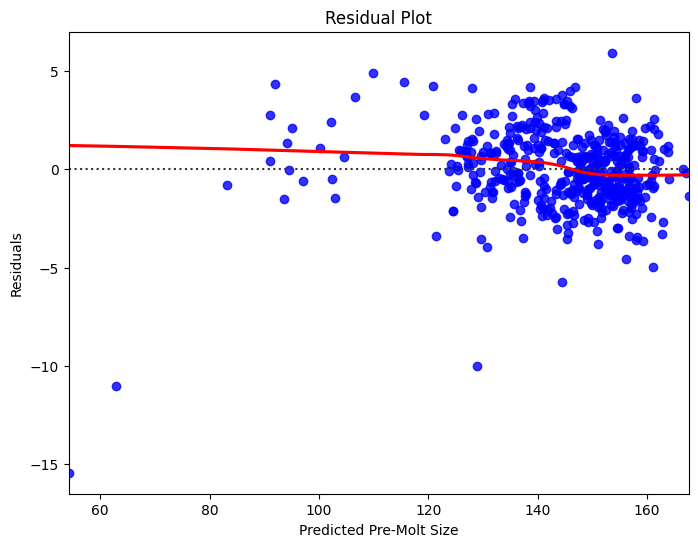

In [19]:
residuals = Y -  prediction
plt.figure(figsize=(8, 6))
sns.residplot(x=prediction, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Pre-Molt Size')
plt.ylabel('Residuals')
plt.show()

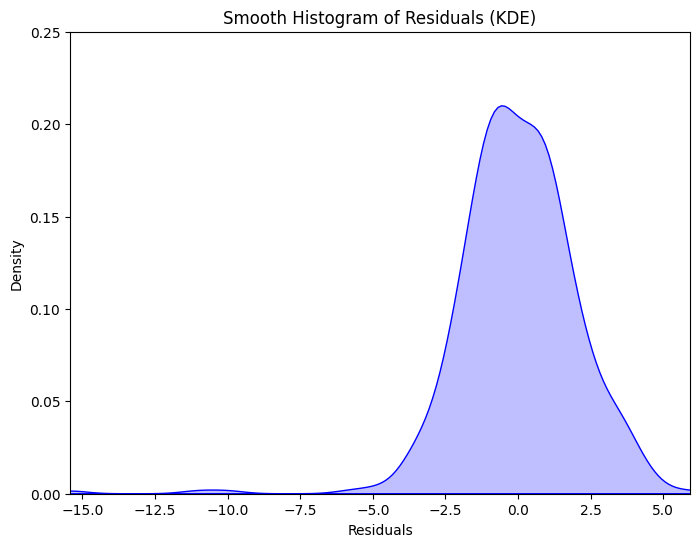

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.title('Smooth Histogram of Residuals (KDE)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.xlim(min(residuals), max(residuals))
plt.ylim(0, 0.25)
plt.show()

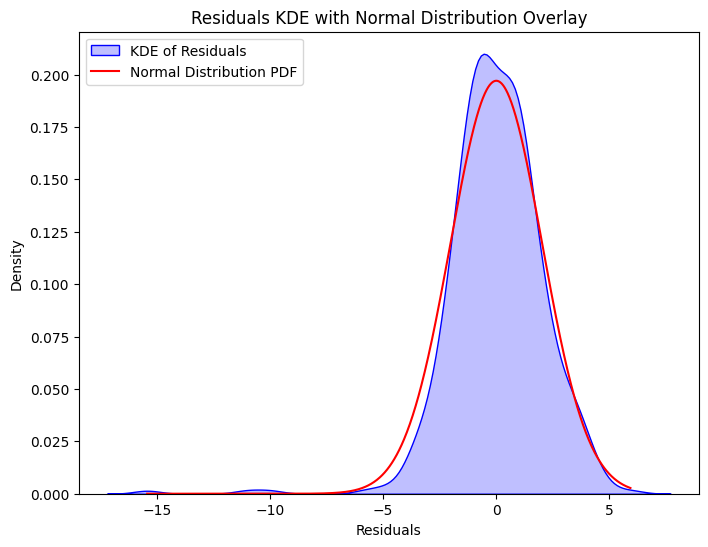

In [24]:
from scipy.stats import norm
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
x_values = np.linspace(min(residuals), max(residuals), 1000)
normal_pdf = norm.pdf(x_values, residuals_mean, residuals_std)
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', fill=True, label='KDE of Residuals')
plt.plot(x_values, normal_pdf, color='red', label='Normal Distribution PDF')
plt.title('Residuals KDE with Normal Distribution Overlay')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

In [25]:
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
within_one_std = np.sum((residuals > (residuals_mean - residuals_std)) &
                        (residuals < (residuals_mean + residuals_std))) / len(residuals)
print(f'Proportion of residuals within one standard deviation: {within_one_std}')
integral = norm.cdf(1) - norm.cdf(-1)
print(f'Integral of standard normal distribution PDF from -1 to 1: {integral}')

Proportion of residuals within one standard deviation: 0.7457627118644068
Integral of standard normal distribution PDF from -1 to 1: 0.6826894921370859


In [26]:
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
upper_outliers = np.sum(residuals > (residuals_mean + 2 * residuals_std)) / len(residuals)
lower_outliers = np.sum(residuals < (residuals_mean - 2 * residuals_std)) / len(residuals)
print(f'Proportion of residuals > mean + 2*std: {upper_outliers}')
print(f'Proportion of residuals < mean - 2*std: {lower_outliers}')

Proportion of residuals > mean + 2*std: 0.01694915254237288
Proportion of residuals < mean - 2*std: 0.012711864406779662


Quantile plot for residuals

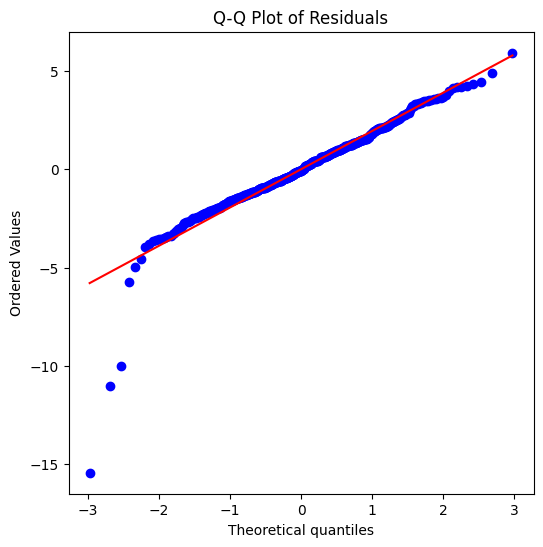

In [32]:
from scipy.stats import probplot
plt.figure(figsize=(6, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Checking the normality distibution for the residuals

In [33]:
ad_test = anderson(residuals)
print(f"Anderson-Darling test statistic: {ad_test.statistic}, Critical values: {ad_test.critical_values}")

Anderson-Darling test statistic: 2.5820577584034936, Critical values: [0.571 0.651 0.78  0.91  1.083]


In [34]:
ks_test = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"Kolmogorov-Smirnov test statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

Kolmogorov-Smirnov test statistic: 0.05608521000222608, p-value: 0.09881882979390044


In [35]:
cvm_test = cramervonmises(residuals, 'norm')
print(f"Cramér-von Mises test statistic: {cvm_test.statistic}, p-value: {cvm_test.pvalue}")

Cramér-von Mises test statistic: 4.654441277989497, p-value: 2.3840707186195687e-11


In [36]:
sw_test = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {sw_test.statistic}, p-value: {sw_test.pvalue}")

Shapiro-Wilk test statistic: 0.9184720718599984, p-value: 2.744727885461164e-15


Heteroskedasticity

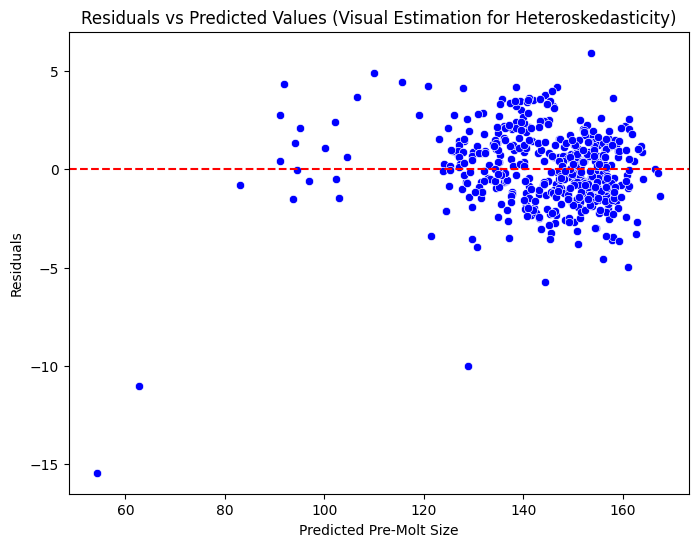

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=prediction, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Visual Estimation for Heteroskedasticity)')
plt.xlabel('Predicted Pre-Molt Size')
plt.ylabel('Residuals')
plt.show()

Statistical tests

In [38]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import statsmodels.api as sm
X_with_const = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_with_const)
bp_pvalue = bp_test[1]
print(f"Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_pvalue}")

Breusch-Pagan test statistic: 67.43361312510208, p-value: 2.1790209974465215e-16


In [39]:
white_test = het_white(residuals, X_with_const)
white_pvalue = white_test[1]
print(f"White test statistic: {white_test[0]}, p-value: {white_pvalue}")

White test statistic: 210.46605217458057, p-value: 1.985534585421246e-46


Interaction regression (premolt * Location)

In [44]:
crab_data = pd.read_csv('/content/Crab Molt Data.csv')
field_crabs = crab_data[crab_data['Location'] == '0']
lab_crabs = crab_data[crab_data['Location'] == '1']
field_crabs.to_csv('field_crabs.csv', index=False)
lab_crabs.to_csv('lab_crabs.csv', index=False)
print("Field and Lab crab data have been saved separately.")

Field and Lab crab data have been saved separately.


In [45]:
lab_crabs = crab_data[crab_data['Location'] == 'Lab']
field_crabs = crab_data[crab_data['Location'] == 'Field']

In [47]:
import statsmodels.api as sm
X_lab = sm.add_constant(lab_crabs['Pre-molt'])
y_lab = lab_crabs['Post-molt']
model_lab = sm.OLS(y_lab, X_lab).fit()
X_field = sm.add_constant(field_crabs['Pre-molt'])
y_field = field_crabs['Post-molt']
model_field = sm.OLS(y_field, X_field).fit()
print(model_lab.summary())
print(model_field.summary())

                            OLS Regression Results                            
Dep. Variable:              Post-molt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.853e+04
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          4.67e-311
Time:                        15:15:43   Log-Likelihood:                -780.67
No. Observations:                 361   AIC:                             1565.
Df Residuals:                     359   BIC:                             1573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8319      0.854     30.248      0.0

In [48]:
crab_data['Lab'] = crab_data['Location'].apply(lambda x: 1 if x == 'Lab' else 0)
crab_data['PreMolt_Lab'] = crab_data['Pre-molt'] * crab_data['Lab']
X = sm.add_constant(crab_data[['Pre-molt', 'Lab', 'PreMolt_Lab']])
y = crab_data['Post-molt']
model_interaction = sm.OLS(y, X).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:              Post-molt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     7999.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:16:29   Log-Likelihood:                -1002.2
No. Observations:                 472   AIC:                             2012.
Df Residuals:                     468   BIC:                             2029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          28.5436      3.718      7.677      

In [50]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
crab_data['Lab'] = crab_data['Location'].apply(lambda x: 1 if x == 'Lab' else 0)
crab_data['PreMolt_Lab'] = crab_data['Pre-molt'] * crab_data['Lab']
X = crab_data[['Pre-molt', 'Lab', 'PreMolt_Lab']]
y = crab_data['Post-molt']
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_mae = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
cross_val_mse = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
cross_val_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
model.fit(X, y)
y_pred = model.predict(X)

In [51]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 1.4842971663248623
Mean Squared Error (MSE): 4.0914792830505275
R² Score: 0.9808713833622429


In [52]:
print(f'Cross-Validated Mean Absolute Error (MAE): {cross_val_mae.mean()}')
print(f'Cross-Validated Mean Squared Error (MSE): {cross_val_mse.mean()}')
print(f'Cross-Validated R² Score: {cross_val_r2.mean()}')

Cross-Validated Mean Absolute Error (MAE): 1.4954949204229826
Cross-Validated Mean Squared Error (MSE): 4.259607516290005
Cross-Validated R² Score: 0.9801281734562133


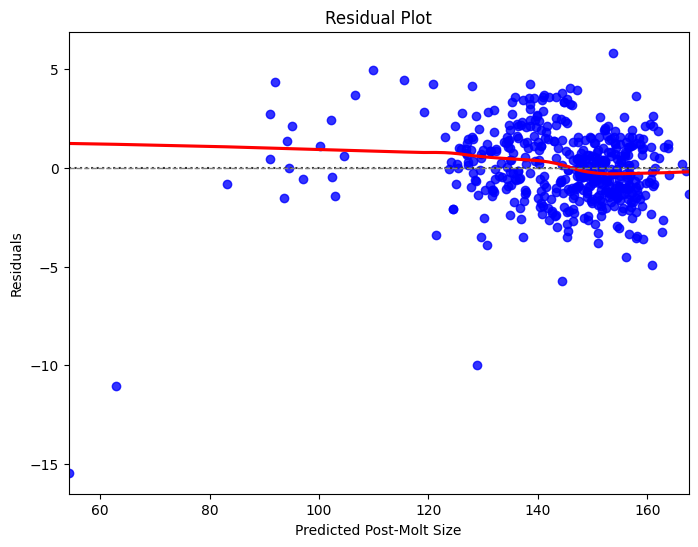

In [53]:
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Post-Molt Size')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

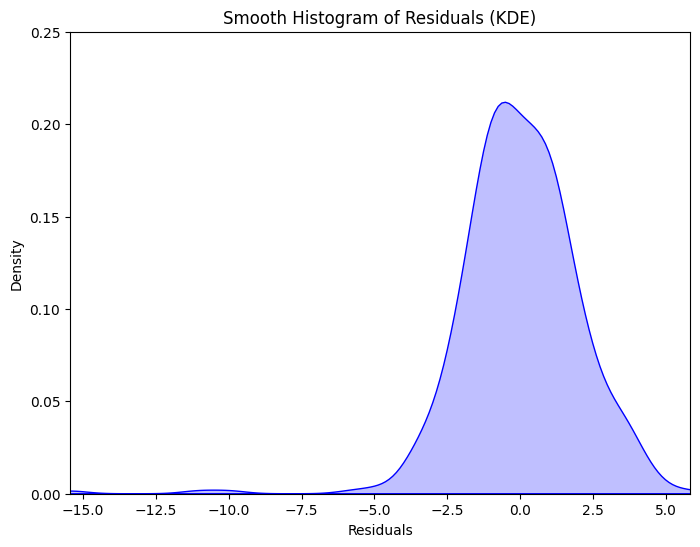

In [54]:
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.title('Smooth Histogram of Residuals (KDE)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.xlim(min(residuals), max(residuals))
plt.ylim(0, 0.25)
plt.show()

In [55]:
mean_residual = residuals.mean()
std_residual = residuals.std()
prop_within_one_std = ((mean_residual - std_residual < residuals) & (residuals < mean_residual + std_residual)).mean()
print(f'Proportion of residuals within one standard deviation: {prop_within_one_std}')
prop_greater_than_two_std = (residuals > mean_residual + 2 * std_residual).mean()
print(f'Proportion of residuals > mean + 2*std: {prop_greater_than_two_std}')
prop_less_than_two_std = (residuals < mean_residual - 2 * std_residual).mean()
print(f'Proportion of residuals < mean - 2*std: {prop_less_than_two_std}')

Proportion of residuals within one standard deviation: 0.7415254237288136
Proportion of residuals > mean + 2*std: 0.014830508474576272
Proportion of residuals < mean - 2*std: 0.012711864406779662


# Method 2 Approach

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv("Crab Molt Data.csv")
data

,Post-molt,Pre-molt,Location
0,127.7,113.6,Field
1,133.2,118.1,Field
2,135.3,119.9,Field
3,143.3,126.2,Field
4,139.3,126.7,Field
...,...,...,...
467,150.3,135.9,Lab
468,151.2,135.6,Lab
469,143.5,129.6,Lab
470,148.3,134.1,Lab


In [3]:
df1 = data[data['Location'] == "Field"]
df2 = data[data['Location'] == "Lab"]

Field dataset Work

R-squared: 0.9327747000533485


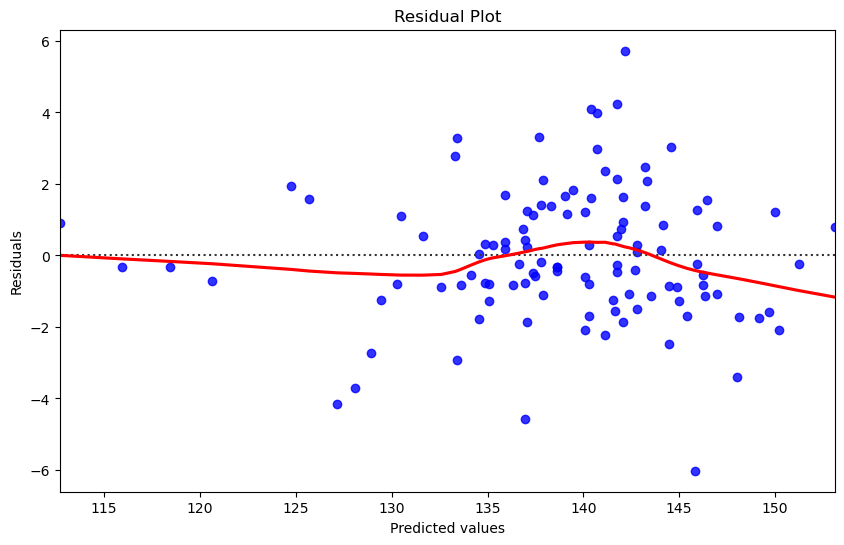

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.diagnostic import normal_ad
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot

# Model prediction 
X = df1['Post-molt'].values.reshape(-1, 1)
y = df1['Pre-molt'].values

# Fit linear model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

# Step 2: Residual Analysis
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={'color':'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()



Skewness: 0.035556233639723565
Kurtosis: 0.9129150626627078


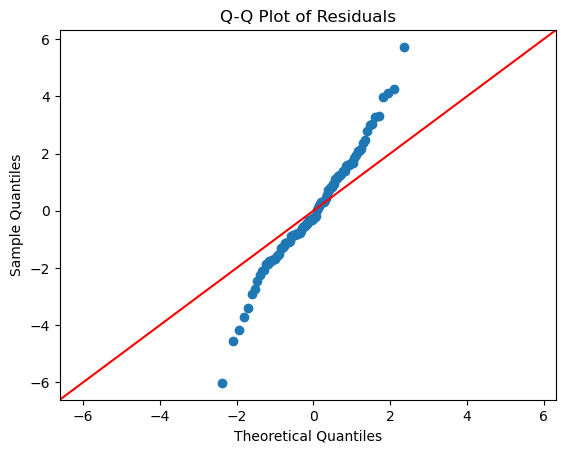

Kolmogorov-Smirnov Test: Stat=0.15240979942179145, P-value=0.010230588359535796
Anderson-Darling Test: Stat=0.558274122267207, P-value=0.14604700764308565
Shapiro-Wilk Test: Stat=0.9856516718864441, P-value=0.2832898199558258


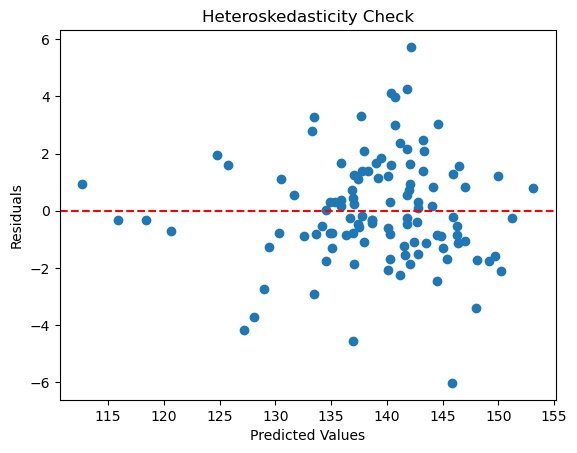

Breusch-Pagan Test: Lagrange Multiplier stat=0.21983906475036463, p-value=0.6391625703140218
White Test: LM stat=0.41799167677557325, p-value=0.8113986123627602


In [8]:
# Step 3: Check Normality of Residuals
# Skewness and Kurtosis
res_skewness = skew(residuals)
res_kurtosis = kurtosis(residuals)
print(f"Skewness: {res_skewness}")
print(f"Kurtosis: {res_kurtosis}")

# Quantile-Quantile plot of residuals
qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Normality tests
ks_stat, ks_p_value = stats.kstest(residuals, 'norm')
ad_stat, ad_p_value = normal_ad(residuals)
sw_stat, sw_p_value = stats.shapiro(residuals)

print(f"Kolmogorov-Smirnov Test: Stat={ks_stat}, P-value={ks_p_value}")
print(f"Anderson-Darling Test: Stat={ad_stat}, P-value={ad_p_value}")
print(f"Shapiro-Wilk Test: Stat={sw_stat}, P-value={sw_p_value}")

# Step 4: Heteroskedasticity Tests
plt.scatter(y_pred, residuals)
plt.title('Heteroskedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Breusch-Pagan test
X_with_const = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan Test: Lagrange Multiplier stat={bp_test[0]}, p-value={bp_test[1]}")

# White test
white_test = het_white(residuals, X_with_const)
print(f"White Test: LM stat={white_test[0]}, p-value={white_test[1]}")


Lab data work

R-squared: 0.9809989339639513


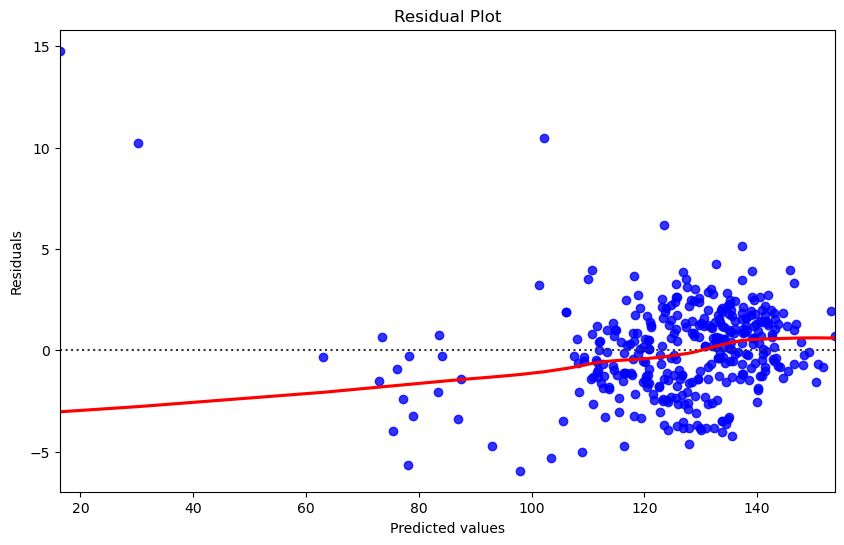

In [9]:
#Model prediction
X = df2['Post-molt'].values.reshape(-1, 1)
y = df2['Pre-molt'].values

# Fit linear model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

# Step 2: Residual Analysis
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={'color':'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

Skewness: 1.0124432564966326
Kurtosis: 6.000611992318094


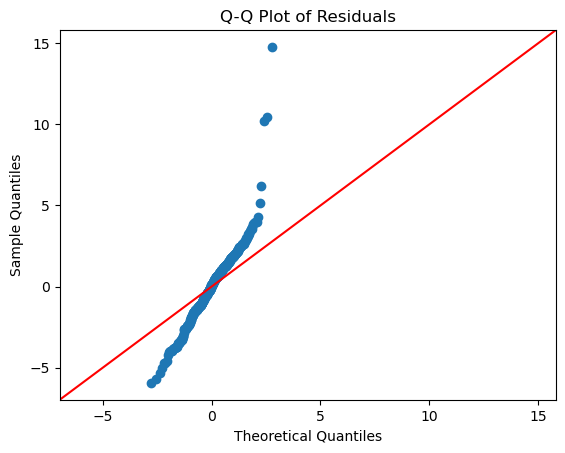

Kolmogorov-Smirnov Test: Stat=0.17938389522854037, P-value=1.234683845305599e-10
Anderson-Darling Test: Stat=1.883114708009657, P-value=8.16320786932427e-05
Shapiro-Wilk Test: Stat=0.9337345957756042, P-value=1.3763361977892075e-11


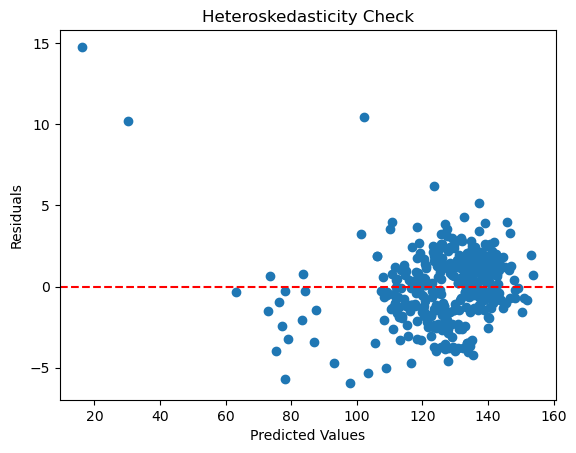

Breusch-Pagan Test: Lagrange Multiplier stat=79.96815660964657, p-value=3.804926341823913e-19
White Test: LM stat=194.13903288206814, p-value=6.970190513177798e-43


In [10]:
# Step 3: Check Normality of Residuals
# Skewness and Kurtosis
res_skewness = skew(residuals)
res_kurtosis = kurtosis(residuals)
print(f"Skewness: {res_skewness}")
print(f"Kurtosis: {res_kurtosis}")

# Quantile-Quantile plot of residuals
qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Normality tests
ks_stat, ks_p_value = stats.kstest(residuals, 'norm')
ad_stat, ad_p_value = normal_ad(residuals)
sw_stat, sw_p_value = stats.shapiro(residuals)

print(f"Kolmogorov-Smirnov Test: Stat={ks_stat}, P-value={ks_p_value}")
print(f"Anderson-Darling Test: Stat={ad_stat}, P-value={ad_p_value}")
print(f"Shapiro-Wilk Test: Stat={sw_stat}, P-value={sw_p_value}")

# Step 4: Heteroskedasticity Tests
plt.scatter(y_pred, residuals)
plt.title('Heteroskedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Breusch-Pagan test
X_with_const = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan Test: Lagrange Multiplier stat={bp_test[0]}, p-value={bp_test[1]}")

# White test
white_test = het_white(residuals, X_with_const)
print(f"White Test: LM stat={white_test[0]}, p-value={white_test[1]}")
